# 221. Линейно разделимая выборка

Пусть имеются $n$ объектов: $X={x_1,x_2,...,x_n}$,  каждый из которых представлен вектором вещественных признаков: $x_i\in{R^m}$. Каждый объект относится к одному из двух классов, так что имеется также набор величин ${y_1, y_2,...,y_n}$, таких, что $y_i=+1$, если $x_i$ относится к первому классу, и $y_i=-1$, если $x_i$ относится ко второму классу. Известно, что выборка является линейно разделимой, то есть, существует вектор $a\in{R^m}$ такой, что:
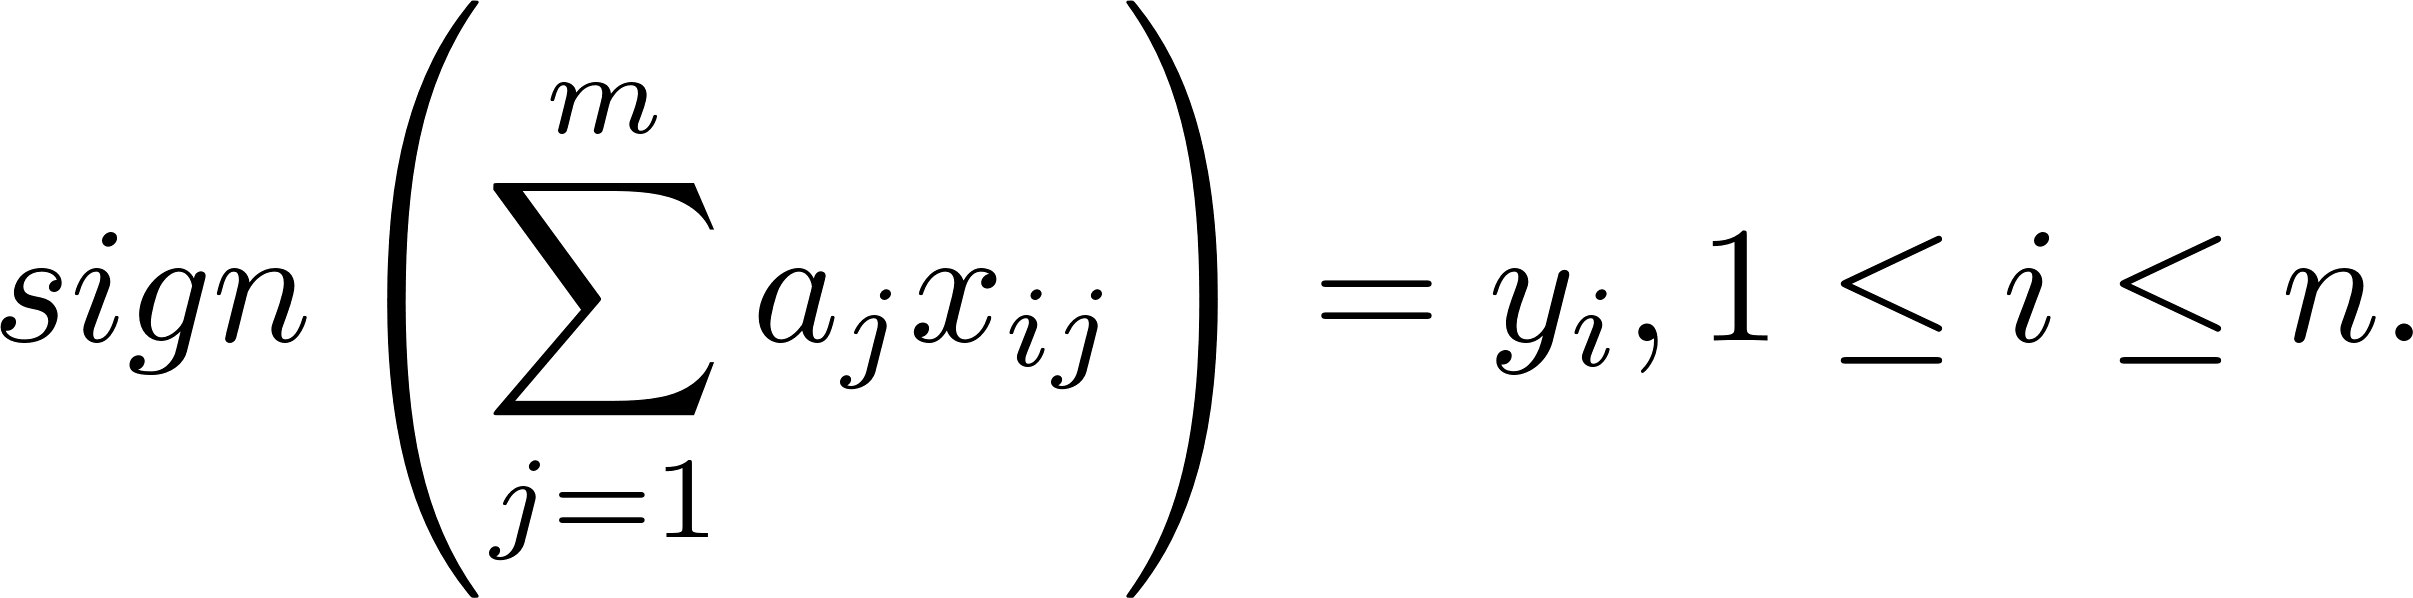

Требуется по предоставленной выборке построить любой разделяющий вектор, то есть вектор, удовлетворяющий указанной выше системе уравнений.

**Формат ввода**

Входной файл в первой строчке содержит два числа: $n$ и $m$, $1≤n≤10^4$ и $1≤m≤10$. Каждая из следующих $n$ строчек содержит ровно $(m+1)$ число; первые $m$ чисел каждой строчки представляют значения признаков некоторого объекта, а последнее число строчки — соответствующий этому объекту класс. Разделителем внутри каждой строки является пробел.

**Формат вывода**

Выходной файл должен содержать ровно $m$ вещественных чисел, разделённых пробелом — компоненты разделяющей гиперплоскости.

## Пример 1

**Ввод**<br>
2 1<br>
-1 -1<br>
1 1<br>

**Вывод**<br>
1<br>

## Пример 2

**Ввод**<br>
3 5<br>
1 1 1 1 1 1<br>
1 1 1 1 1 1<br>
1 1 1 1 1 1<br>

**Вывод**<br>
-1 -1 -1 -1 50<br>

## Пример 3

**Ввод**<br>
5 2<br>
9.16539 6.11173 1<br>
6.77396 1.9927 1<br>
8.16425 5.91999 1<br>
5.70351 4.99134 1<br>
9.8318 1.98502 1<br>

**Вывод**<br>
3.14346 6.76429 <br>

## Пример 4

**Ввод**<br>
5 5<br>
1.7826 4.68275 6.10123 7.32859 7.38209 1<br>
4.27658 4.67522 4.81731 5.19996 3.11343 1<br>
7.91009 0.640944 6.30974 6.36116 0.81165 1<br>
1.05574 8.23438 6.05421 7.44865 1.25079 1<br>
1.43015 6.27736 4.77795 5.68318 0.370549 1<br>

**Вывод**<br>
9.25372 1.03849 6.72657 2.0464 1.49246 <br>

*P.s. сказано, что "построить любой разделяющий вектор", т.е. коэффиценты не обязательно должны совпадать с коэффицентами с примеров.*

*Поэтому для решения мы берем обычный метод опорных векторов, который строит разделяющую гиперплоскость и возвращает параметры этой гиперплоскости.*

In [ ]:
import sys
import pandas as pd
from sklearn.svm import SVC

def main():
    pass
    

if __name__ == '__main__':
    train = []
    n, m = list(map(int, input().split()))
    for i in range(n):
        train.append(list(map(float, input().split())))

    train = pd.DataFrame(train)
    train = pd.concat([train, train*-1])
    
    clf = SVC(kernel='linear')
    clf.fit(train.loc[:,:m-1], train[m])
    
    if round(clf.intercept_[0], 3) == 0:
        print(*[round(i,5) for i in clf.coef_[0]])
    else:
        print(*[round(i,5) for i in clf.coef_[0]], round(clf.intercept_[0], 5))